# Preventing Starvation in Shortest Job First Scheduling Algorithm: An Applied Study on Starvation Free SJF Implementation

**Author(s)**  
Enden, L. van den  
[453142@student.fontys.com](mailto:453142@student.fontys.com)  

**Course/Institution Name**  
AP-SYNC  
Fontys University of Applied Sciences  

**Date**  
11/18/2024

<!-- Feedback hans week 1 on ideation:
Kun je SJF in een gegeven OS implementatie uitpleizen en emuleren in haalbare tijd?

Doe even vooronderzoek of het haalbaar is dat je SJF van een gegeven linux distro onderzoekt en vervolgens emuleert. Dit geef ik als feedback omdat SJF simpel klinkt maar mogelijk is de implementatie 10000 regels code. Als dat zo is, is het niet haalbaar om dit in de gegeven tijd te doen.

Mogelijk dat je arduino OS SJF implementatie pakt, die zijn waarschijnlijk kleiner.

---
Een vereiste is dat je academische bronnen gebruikt en in academische style bron vermelding doet.

-->
<!-- 

SEE COMMENT FOR PLANNING:

Week 1: ideation
Week 2: Gathering sources on: SJF definition and history, SJF advantages / disatvanteges, SJF example implementation, job starvation, job starvation prevention methods, pro's and con's on prevention methods
Week 3: Implementing the SJF algorithm in Python
Week 4: Implementing the SJF algorithm in Python
Week 5: Finalizing the research
 -->

## The Research Goal
I want to research how the smallest job first (SJF) scheduling algorithm can be expanded upon such that longer jobs will still be able to complete, regardless of how many other smaller jobs are in the queue.

In other words: 
> How can one create a starvation free implementation of the Smallest Job First (SJF) scheduling algorithm?

### My Reasoning Behind The Goal

Before starting this class, I explored a similar issue on a hobby level, designing a fairness-oriented queue for a supermarket scenario. In that work, I used basket size as a metric to determine queue priority, balancing efficiency with fairness. Then, a few years later in my SYNC class, I came across the SJF algorithm in a introduciton presentation, where we discussed the issue of job starvation in this particulair scheduling algorithm. 

My goal is to address the challenge of starvation in SJF by adapting it to ensure that longer jobs also have the opportunity to complete.

### Derived Research Questions

The main research question is already described at the bottom of the research goal (just above). However, to make the research more structured, I will break it down into smaller questions:
1. What is the Smallest Job First (SJF) scheduling algorithm?
    1. When was it first introduced?
    2. Why was it introduced?
    3. How does it work?
    4. What are some of SJF's advantages and disadvantages?
    5. Is their an example of a real-world implementation of SJF (preferably described in pseudo code)?
2. What is job starvation in the context of multi-tasking systems?
    1. Why is job starvation a problem?
    2. What are some of the ways to address job starvation in SJF?
    3. What are the advantages and disadvantages of these solutions?
3. How can the SJF algorithm be adapted to prevent job starvation?
   1. What would the adapted SJF algorithm look like?
   2. Is it possible to create a demo application which emulates a computer using the starvation free SJF algorithm?
   3. How would such a demo application look like?

## Aproach

To achieve this goal, I’ll begin with document analysis and a literature study on SJF scheduling, gathering definitions, principles, and an example implementation (ideally in pseudocode) to establish a foundational understanding. Next, I will conduct further literature, library, and design pattern research to investigate starvation—specifically, what causes it in scheduling algorithms and how it can be prevented.

Finally, using the DOT framework pattern Realise as Expert and its associated methods, I will create a proof of concept for a starvation-free SJF algorithm. This iterative approach will help me integrate the theoretical and practical aspects necessary to design an SJF implementation that ensures all job types have an opportunity to complete.

## On Source Collection

I will start my source collection using Perplexity AI as an initial tool for gathering relevant documents and insights on SJF scheduling and starvation. From there, I will continue with a targeted search on Google Scholar to deepen my findings, focusing on academic sources that provide detailed explanations, definitions, and examples to support each step of my research.

## Deliverables

The deliverables for this research project are as follows:
- This research paper, documenting the study and findings on preventing starvation in the SJF scheduling algorithm.
- A text file (TXT) containing pseudocode for a starvation-free SJF algorithm.
- An implementation of the pseudocode in Python.
- Test cases for validating the implementation.
    - Thread outputs will be saved in a timeline format to support visualization purposes.

## What is the Smallest Job First (SJF) scheduling algorithm?

This chapter uses a library study approach within the DOT-framework method to explore SJF scheduling. It systematically addresses the main question and its sub-questions by analyzing existing literature and technical resources. This includes some study on the history of SJF (and in extention parallel digital computing), examining SJF's principles, its preemptive and non-preemptive variants, advantages, disadvantages, and practical implementation considerations.

### When was it first introduced?

While it is extremly hard to pin-point the exact first mention of the SJF algorithm, we can find mentions of the underlying problems & principles for SJF as early as 1959 in the paper "Multiprogramming STRETCH: Feasibility Considerations" at page 14 (page 2 of the PDF source):
> Allocation of space in core and disk storage, assignment of input-output units, and **control of time-sharing** should be based upon the needs of the programs being executed

Even earlier, a mention of a binary computer suppositly supporting parallel operations was made in the paper "A Survey Of Automatic Digital Computers 1953" at page 6 :
> (Automatic Binary Computer)  
> built by: Air Force Cambridge Research Center, Cambridge, Massachusettsfirst ...  
> ready for use: May 1953 ...  
> ARITHMETIC MODE: Parallel

And, even earlier still, it is mentioned in "The electronic numerical integrator and computer (ENIAC)" (published circa 1946) that the ENIAC (the very first general purpose digital computer) had parallel computing capabilities. Alto I could not find any mention of conserns about optimal job scheduling from this same time, I find it highly likeley that the engineers of that time must have been just as curious about this subject as we are now. 

### Why was it introduced?

Although I was unable to pinpoint exactly where in the literature I read it, there appears to be a general consensus that SJF was introduced to improve efficiency by reducing the average wait time in job scheduling.

More specificly, SJF was introduced as a response to the need for efficient resource utilization in multi-tasking systems. As computing resources became increasingly shared among multiple processes, it became apparent that optimizing the order of job execution could significantly reduce overall waiting times. Prioritizing shorter tasks was seen as a way to maximize throughput by quickly clearing shorter jobs from the queue, thus minimizing idle time in the processor. This approach was especially valuable in early multiprogramming environments, where delays in task scheduling could quickly accumulate and impact system performance.

### How does it work?

The SJF scheduling algorithm operates using several key components:
- Burst Time Estimator: This component estimates the burst time (the required execution time) for each process.
- Process Queue: The queue maintains all tasks that are waiting for processing.
- Task Manager: responsible for retrieving/returning tasks from/to the queue and monitoring tasks that are in progress. If a task is paused or needs to wait, the Task Manager returns it to the queue. 

This cycle continues until all tasks are completed.

![SJF algorithm flowchart](./sjf_flowchart.png)

*Figure 1. Illustration of the SJF algorithm's flowchart key components*

#### Optimal for minimizing waiting time
SJF is an optimal scheduling method for minimizing average waiting time in a queue. By always selecting the job with the shortest expected processing time, SJF reduces the total time that jobs spend waiting, making it an efficient choice for systems that handle tasks of varying lengths.

#### 2 main forms of implementation
SJF can be implemented in two main forms: non-preemptive and preemptive. In the non-preemptive version, once a job starts, it runs to completion without interruption. In contrast, the preemptive form, also known as Shortest Remaining Time First (SRTF), allows for the interruption of the current job if a new job with a shorter remaining processing time arrives. This flexibility can further reduce wait times, especially in environments with high task turnover.

#### Burst time estimation
A critical aspect of SJF is the need for an estimated burst time (the time a job will take to complete). As exact burst times are often unknown in advance, the algorithm relies on predictions. Common techniques for estimating burst time include analyzing historical data or using exponential averaging methods, which can help approximate processing times to improve scheduling accuracy.

### What are some of SJF's advantages and disadvantages?

SJF is a non-preemptive scheduling rule, meaning the queue is only evaluated after each job is fully completed. At that point, the job with the shortest estimated running time is selected next, reducing the overall waiting time in the system. This simplicity allows SJF to achieve a lower mean waiting time compared to other scheduling methods, like First-Come, First-Served (FCFS). However, the approach can disadvantage longer jobs, which may experience significant delays. This trade-off results in a lower average wait time but increases the variance in waiting times across jobs.

The preemptive version of SJF, Shortest Remaining Time First (SRTF), can interrupt a job if a new job with a shorter remaining time arrives. This dynamic prioritization can further reduce average waiting times, especially for shorter tasks, making SRTF more responsive in interactive systems. However, SRTF introduces more overhead due to frequent context switching and does not solve the issue of starvation.

To summerize;

SJF
- Non-preemptive: queue is evaluated only after each job completes, ensuring jobs finish entierly before continueing.
- Selects the job with the shortest estimated running time, reducing overall waiting time.
- Achieves lower mean waiting time than First-Come, First-Served (FCFS).
- Disadvantages longer jobs, which may face delays or even complete starvation.
- Results in lower average wait time but higher variance in waiting times.

SRTF
- Preemptive: can interrupt a job if a new, shorter job arrives.
- Reduces average waiting time further from SJF.
- Increases responsiveness in interactive systems.
- Introduces more overhead due to frequent context switching.
- Also has problems with starvation.

### Is their a example of a real-world implementation of SJF (preferably described in pseudo code)?

Unfortunatly, trueought my research I have not been able to find any real world implementations of SJF. I wondered if any populair operating system (like Linux variants or perhaps older versions of Windows) might use SJF, but it seems that all the OS'es I research use a more sophisticated scheduling algorithm. From what I have been able to gather;
- Linux Kernel version 2.5 uses the `O(1) scheduler` (page 234 of Operating System Concepts 10th edition)
- Linux Kernel version 2.6.23 uses the `Completely Fair Scheduler (CFS)` (page 236 of Operating System Concepts 10th edition)
- Windows Kernel (unkown version) uses a complex priority based schedular (page 239 of Operating System Concepts 10th edition)

Due to time limitations and lack of experience with smaller OS'es (like once designed for arduino's for example), I am unable to do further research into possible SJF implementations in real-world systems. As such, I will be designing my own emulator (using self-made diagrams as a starting point instead of the pseudo code), in Python, of how the SJF algorithm works, whilst trying to adhear as much as possible to how an actual operating system functions. That entails using similair terminology, ensuring that all the entities are in play as would be when implemented in a OS (such as a dispatcher, use of process control block, etc.).

## What is job starvation in the context of multi-tasking systems?

In short: job starvation in multi-tasking systems refers to a situation where a process or job is perpetually denied access to the resources it needs to execute and make progress.

<!-- https://csc-knu.github.io/sys-prog/books/Andrew%20S.%20Tanenbaum%20-%20Modern%20Operating%20Systems.pdf -->
Tanenbaum, Andrew (2001). Modern Operating Systems. Prentice Hall. pp. 184–185. ISBN 0-13-092641-8.

To better illustrate what job starvation is, will we use the following scenario troughout this chapter. Suppose we have 2 threads, A and B, and a shared resource, C. Thread A is designed to perform a short task on C every time it gains access, while Thread B requires a longer time to complete its work with C. 

### Why is job starvation a problem?

Suppose we have 2 threads, A and B, both of which need access to a shared resource C. In a system that uses the SJF as its scheduling algorithm, if infinitly many new instances of A continue to arrive in the queue before B gets to the front of the queue, B will keep getting pushed back, as the scheduler prioritizes shorter jobs. At that point, we can state that B is infinitly starving.

Even worse, when a system uses the preemtive version of SJF (SRTF), even if B where to get some time to run, if a new A gets put into the queue before B gets the time it needs to run to completion, B will be halted and put back into the queue. We can then, again, state that B is starving, possible infinitly long depending on the amount of A's being put into the queue.

### What are some of the ways to address job starvation in SJF?

Throughout my research, I found that several strategies can effectively mitigate job starvation, particularly in scheduling algorithms like SJF. Among these, the most promising approaches to me seem to be:
- Aging: Gradually increasing the priority of processes that have been waiting for a long time (page 213 of Operating System Concepts 10th edition)
- Dynamic Time-Slicing: Introduce time-slicing for longer jobs to ensure waiting jobs periodically get execution opportunities. (Dynamic Time Slice Calculation for Round Robin Process Scheduling Using NOC)
- Priority Queues with Minimum Thresholds: Use a separate queue for jobs at risk of starvation, ensuring their execution once they exceed a wait-time threshold.

### What are the advantages and disadvantages of these solutions?

The following outlines the advantages and disadvantages of various strategies to address job starvation, providing real-world scenarios to illustrate how these solutions may perform in practice.

**Aging:**  
- **Advantages**: Prevents processes from waiting indefinitely by gradually increasing their priority. For example, a long simulation job in a shared lab system will eventually execute even with constant smaller job submissions.  
- **Disadvantages**: Can lead to priority inflation, where less critical tasks preempt more urgent ones. For instance, a long background job could delay interactive user queries.  

**Dynamic Time-Slicing:**  
- **Advantages**: Ensures longer jobs get periodic execution opportunities, maintaining fairness. For example, on a web server, this allows large file uploads to progress without being completely blocked by smaller requests.  
- **Disadvantages**: Adds complexity and overhead due to frequent context-switching, which can reduce overall system performance, such as in high-performance computing environments.  

**Priority Queues with Minimum Thresholds:**  
- **Advantages**: Ensures that processes waiting beyond a certain time are executed. For example, critical maintenance jobs in cloud applications are handled despite continuous user-driven workloads.  
- **Disadvantages**: Increases system complexity and may disrupt optimized scheduling, leading to inefficiencies like longer response times for regular tasks in database servers.  

## How can the SJF algorithm be adapted to prevent job starvation?

Multiple approaches can be employed to mitigate starvation in the Shortest Job First (SJF) scheduling algorithm. These include introducing priority queues, dynamic priority adjustments, and aging. After evaluating these methods, I have chosen to implement the aging technique.

Aging involves gradually increasing the priority of a process as it spends more time in the ready queue. By doing so, long-waiting processes are eventually given a higher priority, ensuring they are executed even if shorter processes continue to arrive. This method maintains the benefits of SJF while reducing the likelihood of indefinite delays for longer jobs.

### What would the adapted SJF algorithm look like?

The adaptation of the SJF algorithm incorporates an age property for queue items, represented as an integer that starts at 0 when an item enters the queue. This property is used to dynamically switch prioritization between older items and shorter jobs.

To illustrate this better, I made the following diagram:

![Custom SJF Algorithm - process selection flowchart](custom_sjf_flowchart.png)

*Figure 2: The process selection flowchart for the SJF Algorithm, taking process age into account.*

The decision-making process in this adapted version of SJF considers the age of processes. Whenever a process is removed from the ready queue for execution, the remaining items in the queue have their age incremented by 1. Once an item in the ready queue exceeds a predetermined age threshold, the queue is sorted to prioritize older items with longer burst times, placing them at the front of the queue. If no items exceed the age threshold, the queue is sorted by burst time, prioritizing shorter jobs.

After sorting, the scheduler simply selects the first item from the queue for execution. This approach balances the benefits of SJF while mitigating starvation for older processes.

#### Performance considerations

The scheduler does not need to sort the entire queue every time it selects an item for execution. Instead, we can use a simple for loop with conditional logic to iterate through the queue. During this loop, the scheduler can evaluate each item based on the defined conditions (e.g., age and burst time). Once the most suitable item is identified, it can be removed from the queue and returned for execution.

This approach eliminates the overhead of sorting the queue entirely, which could potentially reduce the time complexity of the selection process. It might be worthwhile to test which method—sorting the queue versus looping with conditional logic—has the lower time complexity and ultimately uses fewer operations. However, due to time constraints, this analysis will not be performed in this project. Additionally, prioritizing this optimization would deviate from the core focus of the course, which is asynchronous programming, rather than micro-optimizing synchronous operations.

#### Is the implementation truelly starvation free?

If this implementation were to be used in an actual operating system, there remains the possibility of starvation occurring due to programmer errors or mismanagement of the algorithm's parameters. For instance, if the age threshold is set too high or the increment logic is flawed, some processes might still experience delays that resemble starvation.

That said, the algorithm itself is designed to be inherently starvation-free. By incrementing the age of all processes in the ready queue each time a process is selected, older processes are guaranteed to eventually surpass the age threshold. Once this happens, the scheduler prioritizes these older processes, ensuring they are executed regardless of their burst times.

Thus, while implementation mistakes could introduce issues, the algorithm—when correctly implemented—ensures that no process is indefinitely delayed, making it starvation-free in principle.

### Is it possible to create a demo application which emulates a computer using the starvation free SJF algorithm?

Yes, it is possible to create an emulation application to demonstrate the functionality of the starvation-free SJF algorithm. This application would simulate the behavior of a CPU scheduler by utilizing similair objects as used in an actual OS. 

To prove this, I designed the following system, in which I tried to adhere to definitions of real world objects used in running processes in an operating system. Most of the definitions used in designing the emulation code are derived from the book Operating System Concepts (10th edition).

![Emulation code CRC diagram](./emulation_code_crc.png)

*Figure 3: the CRC diagram for the emulation code*

The actual implementation can be found inside [`sjf_emulation.py`](./sjf_emulation.py). The file itself includes some system tests, one which specificly tests whether a longer process that gets put at the end of the ready queue gets ran, even with many more shorter processes in front of it in the queue. The code bellow is essentially that same test:

<!-- ### Demo

TODO: describe the demo section that displayes the proof for research question "how can SJF be adapted to prevent starvation?"

### Visualization

TODO: describe the use of ipywidgets for visualization in this notebook 
TODO: create gantt diagram for current process queue and completed processes. Make completed processes queue display up to last X completed processes and current process queue first N next processes -->

In [1]:
import sjf_emulation
from sjf_emulation import QueueItemGenerator, Schedular, ReadyQueue, Dispatcher, CompletedQueue

sjf_emulation._verbose = False # Set to True to see the logs

# Instantiate the classes
queue_item_generator = QueueItemGenerator()
scheduler = Schedular(age_threshold=2) # Some low value for illustrative purposes
ready_queue = ReadyQueue()
dispatcher = Dispatcher()
completed_queue = CompletedQueue()

# Generate N processes
N = 10
for _ in range(N):
    ready_queue.add(
        queue_item_generator.generate_item(
            max_long_thread_change=0    # Set to 0 to force creation of short threads
        )
    )

# Add one long thread to the ready queue
ready_queue.add(
    queue_item_generator.generate_item(
        max_long_thread_change=1        # Set to 1 to force creation of long threads. Values > 1 will actually lower the probability of creating long threads. Exactly 1 equals 100% chance of creating long threads
    )
)

# Run half of the processes
while len(completed_queue) <= len(ready_queue) // 2:
    dispatcher.dispatch(
        scheduler,
        ready_queue,
        completed_queue
    )

# Print the results
for i, queue_item in enumerate(completed_queue):
    print(f"{i}\t Process {queue_item.process.id} with burst time {queue_item.process.bt_sum}")

0	 Process 4 with burst time 2.55
1	 Process 7 with burst time 2.92
2	 Process 11 with burst time 4.65
3	 Process 9 with burst time 4.05


### Visual plot of the queue's after running

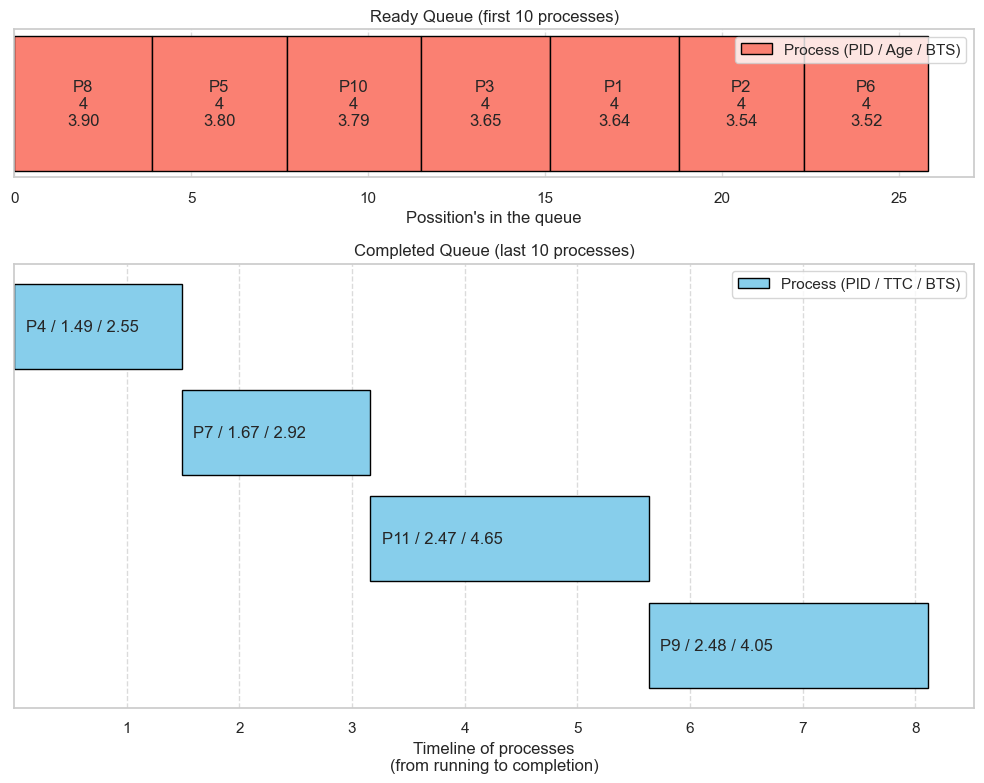

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Queue visualization setup
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [1, 3]})  # Single column, two rows

# Completed Queue Plot
cq_title = "Completed Queue (last {0} processes)"
cq_x_lbl = "Timeline of processes\n(from running to completion)"
cq_ax = 1

# Ready Queue Plot
rq_title = "Ready Queue (first {0} processes)"
rq_x_lbl = "Possition's in the queue"
rq_ax = 0

def update_queue_plot(rq, cq):
    # Clear the subplots
    ax[rq_ax].clear()
    ax[cq_ax].clear()
    items_to_visualize = 10

    # Ready Queue: keep order determined by the scheduler
    rq_data = rq.get_first_n(items_to_visualize) # Get the first N items

    # Plot the bars for the ready queue individually
    start = 0  # Start position for stacking bars
    for qi in rq_data:
        bt_sum = qi.process.bt_sum
        ax[rq_ax].barh(
            y=0,  # Keep all bars on the same y-axis value
            width=bt_sum,  # Width is the average burst time
            left=start,  # Start position for the current bar
            height=0.5,  # Adjust bar height as needed
            align='center',
            color='salmon',  # Customize color if necessary
            edgecolor='black'
        )
        txt = f"P{qi.process.id}\n{qi.age}\n{bt_sum:.2f}"
        ax[rq_ax].text(
            x=start + bt_sum / 2,  # Position text in the middle of the bar
            y=0,  # Keep all text on the same y-axis value
            s=txt,  # Display the process ID
            ha='center',  # Center the text horizontally
            va='center'  # Center the text vertically
        )
        start += bt_sum  # Update start position for the next bar

    ax[rq_ax].set_xlabel(rq_x_lbl)
    ax[rq_ax].set_yticks([])  # No y-ticks needed
    ax[rq_ax].set_title(rq_title.format(items_to_visualize))
    ax[rq_ax].grid(axis="x", linestyle="--", alpha=0.7)

    # Completed Queue: sorted by arrival time
    cq_data = cq.get_last_n(items_to_visualize)

    # Plot completed queue as a gannt chart
    for i, qi in enumerate(cq_data):
        ax[cq_ax].barh(
            y=i, 
            width=qi.process.ttc, 
            left=qi.arrival_time - qi.process.ttc, 
            color='skyblue', 
            edgecolor='black'
        )
        txt = f"P{qi.process.id} / {qi.process.ttc:.2f} / {qi.process.bt_sum:.2f}"
        ax[cq_ax].text(
            x=qi.arrival_time - qi.process.ttc + 0.1, 
            y=i, 
            s=txt, 
            va='center'
        )

    ax[cq_ax].set_xlabel(cq_x_lbl)

    ax[cq_ax].invert_yaxis()  # Invert the y-axis to have the first item at the top
    ax[cq_ax].set_yticks([])

    ax[cq_ax].set_title(cq_title.format(items_to_visualize))
    ax[cq_ax].grid(axis="x", linestyle="--", alpha=0.7)

    # Rotate the y-axis labels for better readability
    plt.setp(ax[cq_ax].get_yticklabels(), rotation=45, ha="right")

    # Legend
    ax[cq_ax].legend([f"Process (PID / TTC / BTS)"], loc="upper right")
    ax[rq_ax].legend([f"Process (PID / Age / BTS)"], loc="upper right")

    # Adjust layout for readability
    fig.tight_layout()

    # Redraw the plot
    fig.canvas.draw_idle()

# Display the plot
update_queue_plot(ready_queue, completed_queue)

### Continuously Running Simulation

In this setup, a simulation is executed in a loop that performs the following tasks: 

1. **Item Generation**: At each iteration, new processes are generated using the `QueueItemGenerator` and added to the ready queue. The number and characteristics of these items can be customized to simulate different workloads.

2. **Dispatching**: The scheduler selects the next process to run based on the SJF algorithm adapted to include process aging. The selected process is then dispatched from the ready queue to the completed queue using the `Dispatcher`.

3. **Visualization Update**: After each iteration, the visualization is refreshed. This includes updating the Gantt charts for both the ready queue and completed queue to reflect the current state of the system.

The loop runs continuously, simulating the dynamic nature of process scheduling in real-world systems.

In [3]:
import ipywidgets as widgets
from io import BytesIO
import threading
import time
from IPython.display import display
from sjf_emulation import Simulation

In [4]:
# Instantiate the simulation
sim = Simulation()
sim.scheduler.age_threshold = 30
sim.setup(
    N_start_processes=50, 
    N_items_to_keep_ready=10
)

#### Simulation visualization setup

In [5]:
default_fontsize = "1.2em"
default_box_layout = widgets.Layout(
    # TODO - Add layout properties
)

In [6]:
schedular_info_title = widgets.HTML("<h3>Schedular Stats</h3>")

schedular_sorting_method_lbl = widgets.Label("Sorting method:")
schedular_sorting_method_lbl.style.font_size = default_fontsize
schedular_sorting_method_val = widgets.Label(sim.scheduler.sorting_style)
schedular_sorting_method_val.style.font_size = default_fontsize

schedular_age_threshold_lbl = widgets.Label("Age threshold:")
schedular_age_threshold_lbl.style.font_size = default_fontsize
schedular_age_threshold_val = widgets.Label(str(sim.scheduler.age_threshold))
schedular_age_threshold_val.style.font_size = default_fontsize

schedular_info_lbls = widgets.VBox([
    schedular_sorting_method_lbl,
    schedular_age_threshold_lbl
])
schedular_info_vals = widgets.VBox([
    schedular_sorting_method_val,
    schedular_age_threshold_val
])
schedular_info = widgets.VBox([
        schedular_info_title,
        widgets.HBox([
            schedular_info_lbls, 
            schedular_info_vals
        ])
    ],
    layout=default_box_layout
)

def update_sorting_info():
    schedular_sorting_method_val.value = sim.scheduler.sorting_style
    schedular_age_threshold_val.value = str(sim.scheduler.age_threshold)

update_sorting_info()

In [7]:
# Process information visualization setup

# Current running process information, including:
rp_id_lbl = widgets.Label("PID:")
rp_id_lbl.style.font_size = default_fontsize
rp_id_val = widgets.Label() # - Process ID
rp_id_val.style.font_size = default_fontsize

rp_state_lbl = widgets.Label("State:")
rp_state_lbl.style.font_size = default_fontsize
rp_state_val = widgets.Label() # - State
rp_state_val.style.font_size = default_fontsize

rp_bt_sum_lbl = widgets.Label("BTD:")
rp_bt_sum_lbl.style.font_size = default_fontsize
rp_bt_sum_val = widgets.Label() # - Burst Time Sum
rp_bt_sum_val.style.font_size = default_fontsize

rp_avg_bt_lbl = widgets.Label("Average BT:")
rp_avg_bt_lbl.style.font_size = default_fontsize
rp_avg_bt_val = widgets.Label() # - Average Burst Time
rp_avg_bt_val.style.font_size = default_fontsize

rp_info_lbls = widgets.VBox([
    rp_id_lbl,
    rp_state_lbl,
    rp_bt_sum_lbl,
    rp_avg_bt_lbl
])
rp_info_vals = widgets.VBox([
    rp_id_val,
    rp_state_val,
    rp_bt_sum_val,
    rp_avg_bt_val
])
rp_info_title = widgets.HTML("<h3>Running Process</h3>")
rp_info = widgets.VBox([
        rp_info_title,
        widgets.HBox([
            rp_info_lbls, 
            rp_info_vals
        ])
    ],
    layout=default_box_layout
)

def update_running_process():
    if sim.dispatcher.CPU.running_process is None:
        if rp_id_val.value != "N/A":
            rp_id_val.value = "N/A"
            rp_state_val.value = "N/A"
            rp_bt_sum_val.value = "N/A"
            rp_avg_bt_val.value = "N/A"
    else:
        rp_id_val.value = str(sim.dispatcher.CPU.running_process.id)
        rp_state_val.value = sim.dispatcher.CPU.running_process.state
        rp_bt_sum_val.value = f"{sim.dispatcher.CPU.running_process.bt_sum:.2f}"
        rp_avg_bt_val.value = f"{sim.dispatcher.CPU.running_process.avg_bt:.2f}"

# Trigger the update functions
update_running_process()

In [8]:
# Ready queue info setup
rq_info_title = widgets.HTML("<h3>Ready Queue Stats</h3>")
rq_len_lbl = widgets.Label("Queue Length:")
rq_len_lbl.style.font_size = default_fontsize
rq_len_val = widgets.Label()
rq_len_val.style.font_size = default_fontsize

rq_min_queue_len_lbl = widgets.Label("Min Queue Length:")
rq_min_queue_len_lbl.style.font_size = default_fontsize
rq_min_queue_len_val = widgets.Label()
rq_min_queue_len_val.style.font_size = default_fontsize

rq_max_age_lbl = widgets.Label("Max Age:")
rq_max_age_lbl.style.font_size = default_fontsize
rq_max_age_val = widgets.Label()
rq_max_age_val.style.font_size = default_fontsize

rq_min_age_lbl = widgets.Label("Min Age:")
rq_min_age_lbl.style.font_size = default_fontsize
rq_min_age_val = widgets.Label()
rq_min_age_val.style.font_size = default_fontsize

rq_max_bt_lbl = widgets.Label("Max BTS:")
rq_max_bt_lbl.style.font_size = default_fontsize
rq_max_bt_val = widgets.Label()
rq_max_bt_val.style.font_size = default_fontsize

rq_min_bt_lbl = widgets.Label("Min BTS:")
rq_min_bt_lbl.style.font_size = default_fontsize
rq_min_bt_val = widgets.Label()
rq_min_bt_val.style.font_size = default_fontsize

rq_info_lbls = widgets.VBox([
    rq_len_lbl,
    rq_min_queue_len_lbl,
    rq_max_age_lbl,
    rq_min_age_lbl,
    rq_max_bt_lbl,
    rq_min_bt_lbl
])
rq_info_vals = widgets.VBox([
    rq_len_val,
    rq_min_queue_len_val,
    rq_max_age_val,
    rq_min_age_val,
    rq_max_bt_val,
    rq_min_bt_val
])
rq_info_box = widgets.VBox([
        rq_info_title,
        widgets.HBox([
            rq_info_lbls, 
            rq_info_vals
        ])
    ],
    layout=default_box_layout
)

def update_ready_queue_info():
    global sim
    
    rq_len_val.value = str(len(sim.ready_queue))
    rq_min_queue_len_val.value = str(sim.N_items_to_keep_ready)
    if len(sim.ready_queue) > 0:
        rq_max_age_val.value = str(max([ x.age for x in sim.ready_queue]))
        rq_min_age_val.value = str(min([ x.age for x in sim.ready_queue]))
        rq_max_bt_val.value = f"{max([ x.process.max_bt for x in sim.ready_queue]):.2f}"
        rq_min_bt_val.value = f"{min([ x.process.min_bt for x in sim.ready_queue]):.2f}"
    else:
        rq_max_age_val.value = "N/A"
        rq_min_age_val.value = "N/A"
        rq_max_bt_val.value = "N/A"
        rq_min_bt_val.value = "N/A"

update_ready_queue_info()

In [9]:
# Completed Queue info setup
cq_info_title = widgets.HTML("<h3>Completed Queue Stats</h3>")
cq_len_lbl = widgets.Label("Queue Length:")
cq_len_lbl.style.font_size = default_fontsize
cq_len_val = widgets.Label()
cq_len_val.style.font_size = default_fontsize

cq_max_bt_lbl = widgets.Label("Max BTS:")
cq_max_bt_lbl.style.font_size = default_fontsize
cq_max_bt_val = widgets.Label()
cq_max_bt_val.style.font_size = default_fontsize

cq_min_bt_lbl = widgets.Label("Min BTS:")
cq_min_bt_lbl.style.font_size = default_fontsize
cq_min_bt_val = widgets.Label()
cq_min_bt_val.style.font_size = default_fontsize

cq_max_ttc_lbl = widgets.Label("Max TTC:")
cq_max_ttc_lbl.style.font_size = default_fontsize
cq_max_ttc_val = widgets.Label()
cq_max_ttc_val.style.font_size = default_fontsize

cq_min_ttc_lbl = widgets.Label("Min TTC:")
cq_min_ttc_lbl.style.font_size = default_fontsize
cq_min_ttc_val = widgets.Label()
cq_min_ttc_val.style.font_size = default_fontsize

cq_ttc_sum_lbl = widgets.Label("Total TTC:")
cq_ttc_sum_lbl.style.font_size = default_fontsize
cq_ttc_sum_val = widgets.Label()
cq_ttc_sum_val.style.font_size = default_fontsize

cq_info_lbls = widgets.VBox([
    cq_len_lbl,
    cq_max_bt_lbl,
    cq_min_bt_lbl,
    cq_max_ttc_lbl,
    cq_min_ttc_lbl,
    cq_ttc_sum_lbl
])
cq_info_vals = widgets.VBox([
    cq_len_val,
    cq_max_bt_val,
    cq_min_bt_val,
    cq_max_ttc_val,
    cq_min_ttc_val,
    cq_ttc_sum_val
])
cq_info_box = widgets.VBox([
    cq_info_title,
    widgets.HBox([
            cq_info_lbls, 
            cq_info_vals
        ],
        layout=default_box_layout
    )
])

def update_completed_queue_info():
    global sim
    
    cq_len_val.value = str(len(sim.completed_queue))
    if len(sim.completed_queue) > 0:
        cq_max_bt_val.value = f"{max([ x.process.bt_sum for x in sim.completed_queue]):.2f}"
        cq_min_bt_val.value = f"{min([ x.process.bt_sum for x in sim.completed_queue]):.2f}"
        cq_max_ttc_val.value = f"{max([ x.process.ttc for x in sim.completed_queue]):.2f}"
        cq_min_ttc_val.value = f"{min([ x.process.ttc for x in sim.completed_queue]):.2f}"
        cq_ttc_sum_val.value = f"{sum([ x.process.ttc for x in sim.completed_queue]):.2f}"
    else:
        cq_max_bt_val.value = "N/A"
        cq_min_bt_val.value = "N/A"
        cq_max_ttc_val.value = "N/A"
        cq_min_ttc_val.value = "N/A"
        cq_ttc_sum_val.value = "N/A"

update_completed_queue_info()

In [10]:
# Create an ipywidget Image from the BytesIO object
img_widget = widgets.Image(
    value=b'',
    format='png'
)

def update_img_widget():
    global img_widget, sim, fig
    update_queue_plot(sim.ready_queue, sim.completed_queue)

    # Save the figure to a BytesIO object
    buf = BytesIO()
    fig.savefig(buf, format='png')
    buf.seek(0)
    img_widget.value = buf.getvalue()

# Trigger the visualization update once to display the initial state
update_img_widget()

In [11]:
# Queue visualization update
def update_visualization():
    update_img_widget()
    update_running_process()
    update_sorting_info()
    update_ready_queue_info()
    update_completed_queue_info()

def continues_update_visualization():
    while True:
        try:
            if sim.is_running:
                update_visualization()
        except Exception as e:
            print(f"Error: {e}")            
        time.sleep(0.5)

vis_thread = threading.Thread(target=continues_update_visualization)
vis_thread.start()
# sim.dispatch_callback = update_visualization

In [12]:
# Simulation buttons
start_simulation_btn = widgets.Button(
    description='Start Simulation',
    button_style='success',
    tooltip='Start the simulation'
)
play_simulation_btn = widgets.ToggleButton(
    value=sim.is_running,
    description='Pause Simulation',
    button_style='info',
    tooltip='Play or pause simulation automatically',
    icon='pause'
)

# Buttons events
def start_simulation(b):
    sim.start()

def pause_resume_sim(change):
    if change['new']:
        play_simulation_btn.icon = 'play'
        sim.pause()
    else:
        play_simulation_btn.icon = 'pause'
        sim.resume()

# Register button events
start_simulation_btn.on_click(start_simulation)
play_simulation_btn.observe(pause_resume_sim, names='value')

sim_btn_box = widgets.HBox([
    start_simulation_btn,
    play_simulation_btn
])

In [13]:
# Initialize the main widget
main_widget = widgets.VBox([
        widgets.HTML("<h1 style='text-align: center;'>Starvation Free SJF Scheduling Algorithm Emulation</h1>"),
        sim_btn_box,
        widgets.HBox([ 
            img_widget, 
            widgets.VBox([
                widgets.HBox([
                    schedular_info,
                    widgets.HTML("<div style='height: 100%; border-left: 1px solid rgba(0, 0, 0, 0.3); margin-left: 2px; margin-right: 2px;'></div>"),
                    rp_info
                ], layout=widgets.Layout(
                    min_width='400px',
                    justify_content='space-between'
                )),
                widgets.HTML("<hr>"),
                widgets.HBox([
                    rq_info_box,
                    widgets.HTML("<div style='height: 100%; border-left: 1px solid rgba(0, 0, 0, 0.3); margin-left: 2px; margin-right: 2px;'></div>"),
                    cq_info_box,
                ], layout=widgets.Layout(
                    min_width='400px',
                    justify_content='space-between'
                ))
            ]) 
        ])
    ],
    layout=widgets.Layout(align_items='center')
)

#### Running the visual representation of the simulation

In [14]:
display(main_widget)

![static simulation snippet](./simulation_snippet.png)
*Figure 4: a static snippet of the simulation running for some time*

#### On making the emulation accurate on every system

To ensure the emulation operates consistently across all systems, I designed the code to isolate the scheduling algorithm from the underlying operating system's own scheduling behavior. My goal was to create an emulation that mirrors real-world scenarios as closely as possible. This included incorporating atomic and non-atomic sections of code into threads, simulating the use of shared resources, and running these threads asynchronously using Python's threading library.

However, by relying on the threading library, the decision-making for which thread or process to execute would ultimately be delegated to the hardware and operating system where the emulation runs. This would undermine the intended demonstration of the SJF algorithm, as the emulation would no longer control the scheduling process entirely.

To address this, I focused solely on emulating the SJF decision-making process rather than attempting to replicate a fully accurate threading or process execution environment. By doing so, I maintained control over the scheduling logic, ensuring that the custom SJF algorithm—particularly its age-based prioritization—was properly illustrated. While this approach sacrifices a "real-world" threading simulation, it stays true to the purpose of demonstrating the custom algorithm in a clear and deterministic way.

The only part of the simulation that leaves disicion making up to the underlying operating system is the running of the threads within any given process:
```python
# in the Process class
    def execute(self):
        """
        Executes the process by running all the threads and waiting for them to finish.
        """
        global _verbose

        # Update state to running
        self.state = "running"
        if _verbose:
            print(f"Process {self.id} is running")

        for thread in self.threads:
            thread.start()
        for thread in self.threads:
            thread.join()

        # After all threads have finished execution, update state to terminated
        self.state = "terminated"
        if _verbose:
            print(f"Process {self.id} has terminated")
```

In the line with `thread.start()`, we religate the running of the threads to the operating system, which dictates the speed at which each thread comes to completion.

In real-life scenarios, the SJF (Shortest Job First) scheduling algorithm relies on an estimated burst time to make decisions about which process to execute next. These estimates are often based on historical data, heuristics, or predictions about the runtime behavior of processes. However, the actual completion time of a process depends heavily on various factors, including system load, hardware limitations, and how the operating system schedules the threads within each process. The OS often runs threads in parallel if sufficient resources are available, but in constrained environments (e.g., limited CPU cores), threads might run sequentially, leading to a longer overall execution time. In this simulation, by summing the burst times of all threads within a process, we are effectively modeling the worst-case scenario where the OS decides to run the threads sequentially due to hardware or scheduling restrictions. This approach ensures that our SJF implementation accounts for the maximum possible completion time of a process, providing a more conservative and realistic approximation of how SJF would behave in a real-life scenario.

#### On improving upon the algorithm in its current form

While the current implementation of the SJF scheduling algorithm provides a basic yet functional simulation, there are several areas where improvements could enhance its realism and utility:

1. **Burst Time Estimation**: The current implementation uses random values for burst times, which simplifies the simulation but lacks accuracy. Real-world systems often estimate burst times using historical data or statistical methods like exponential averaging. Implementing such methods would make the simulation more realistic.
2. **Halting Scenarios**: Adding the ability for threads to halt mid-execution could demonstrate the limitations of non-preemptive SJF. For example, a thread experiencing a delay would increase the overall process completion time, affecting subsequent processes.
3. **Shortest Remaining Time First (SRTF)**: Implementing SRTF, the preemptive version of SJF, would provide a useful comparison. SRTF allows interruption of the current process if a shorter job arrives, highlighting its advantages in handling dynamic workloads.

These changes would make the simulation more representative of real-world scheduling behavior, starting with burst time estimation as a foundational improvement.

## Conclusion

In conclusion, my research into making the Shortest Job First (SJF) scheduling algorithm starvation-free using process aging has provided valuable insights into the complexities of scheduling in asynchronous systems. By reviewing various literature on asynchronous programming, I gained a comprehensive understanding of its history, progress, and the inherent challenges in job scheduling. The concept of process aging offers a practical approach to mitigating starvation, though it also underscores the difficulty of ensuring fair and efficient scheduling in real-world applications. This exploration highlights the balance between simplicity in algorithms and the need for complex adaptations in dynamic environments.

## Sources

1. **What is the Smallest Job First (SJF) scheduling algorithm?**  
   - OSTEP: [Operating Systems: Three Easy Pieces](https://pages.cs.wisc.edu/~remzi/OSTEP/).

1.1 **When was it first introduced?**  
   - Dennis M. Ritchie, "The UNIX Time-Sharing System," Communications of the ACM, 1974: [DOI](https://dl.acm.org/doi/pdf/10.1145/368481.368502).  
   - Bitsavers: *A Survey of Automatic Digital Computers* (1953): [Archive.org](https://archive.org/details/bitsavers_onrASurveyomputers1953_8778395/page/n5/mode/2up).  
   - AMS Mathematics of Computation, 1946: [PDF](https://www.ams.org/journals/mcom/1946-02-015/S0025-5718-1946-0018977-0/S0025-5718-1946-0018977-0.pdf).

1.2 **Why was it introduced?**  
   *(Content missing; sources pending.)*  

1.3 **How does it work?**  
   - Comparative Study on CPU Burst Time Calculation Using Machine Learning: [PDF](https://thegrenze.com/pages/servej.php?fn=326.pdf&name=Comparative%20Study%20on%20Calculating%20CPU%20Burst%20Timeusing%20Different%20Machine%20Learning%20Algorithms&id=1716&association=GRENZE&journal=GIJET&year=2023&volume=9&issue=1).

1.4 **What are some of SJF's advantages and disadvantages?**  
   - "Shortest Job Next Scheduling": Communications of the ACM, 2009: [DOI](https://dl.acm.org/doi/pdf/10.1145/1468075.1468078), page 13.

1.5 **Is there an example of a real-world implementation of SJF (preferably described in pseudo code)?**  
   - *Operating System Concepts*, Silberschatz, Galvin, Gagne, 10th ed., 2018: [PDF](https://os.ecci.ucr.ac.cr/slides/Abraham-Silberschatz-Operating-System-Concepts-10th-2018.pdf).  

2. **What is job starvation in the context of multitasking systems?**  
   *(Content missing; sources pending.)*  

2.1 **Why is job starvation a problem?**  
   *(Content missing; sources pending.)*  

2.2 **What are some of the ways to address job starvation?**  
   - *Operating System Principles*, Silberschatz, Galvin, Gagne, 7th ed., p.159, Chapter 5.3.2: [Shortest-Job-First Scheduling](http://www.cs.put.poznan.pl/akobusinska/downloads/Operating_Systems_Concepts.pdf).  
   - "Dynamic Time Slice Calculation for Round Robin Scheduling Using NOC": [ResearchGate](https://www.researchgate.net/publication/284737403_Dynamic_Time_Slice_Calculation_for_Round_Robin_Process_Scheduling_Using_NOC).  
   - CS 61B Lecture 24: Priority Queues: [Archive.org](https://archive.org/details/ucberkeley_webcast_yIUFT6AKBGE).

2.3 **What are the advantages and disadvantages of these solutions?**  
   *(Content missing; sources pending.)*  

3. **How can the SJF algorithm be adapted to prevent job starvation?**  
   *(Content missing; sources pending.)*  

4. **Additional Sources**  
   - Wikipedia (archived): *Shortest Job Next*: [Wayback Machine](https://web.archive.org/web/20240824073732/https://en.wikipedia.org/wiki/Shortest_job_next).  
   - ChatGPT: [Generated summary](https://chatgpt.com/share/67222564-ad8c-800e-87ef-8f8e25edd98f).  